# Time Slows Down: A Mathematical Study of Gravitational Time Dilation

Time is treated as absolute in classical Newtonian mechanics. In this framework, time flows uniformly and independently of space, matter, or motion. However, this assumption fails when gravitational fields become sufficiently strong. Observations in astrophysics and precision experiments demonstrate that time does not pass at the same rate everywhere in the universe.

In 1915, Einstein’s General Theory of Relativity fundamentally redefined gravity - not as a force, but as the curvature of spacetime caused by mass and energy. Within this geometric framework, time becomes part of a four-dimensional manifold and is influenced by the presence of massive bodies. As a consequence, clocks positioned near massive objects measure time differently from clocks located far away. This phenomenon is known as gravitational time dilation.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from PIL import Image
from pandas.core.arrays import IntervalArray

### Linear Algebra Foundations
##### In relativistic physics, spacetime is modeled as a 4-dimensional vector space equipped with a metric tensor. To formalize this structure, we begin with vector spaces and bilinear forms.
---

### Let V be a vector space over R

We work in a vector space where vectors can be added and multiplied by real scalars.
We then define a metric **g**, a symmetric **bilinear function** on the vector space, which determines how distances are measured in the two-dimensional space

A metric tensor is a symmetric bilinear form:

$$\LARGE \mathbf{g}: \mathbf{V} × \mathbf{V} \rightarrow \mathbb{R}$$

Приема два вектора от геометричното пространство, връща реално число - това число връща геометричната връзка между тези два вектора

In a vector space equipped with an inner product:

- The distance is defined via a norm;

- and the norm is derived from the inner product;

- which yields a real number;

such that:

$$\LARGE \mathbf{g} (\vec{u},\vec{v}) = \mathbf{g} (\vec{v},\vec{u})$$
Метриката е симетрична - това означава, че редът на векторите няма значение. Това гарантира, че геометрията е добре дефинирана (ъгълът между два вектора не зависи от реда).

In matrix representation:

$$\LARGE \mathbf{g}_{\mu\nu} = \begin{bmatrix}
a & b\\
b & c
\end{bmatrix}$$

Матрицата определя как се измерват разстоянията. Това е симетрична матрица, защото при транспониране (редовете стават колони) запазва формата си

Общият случай - произволна симетрична метрика
$$\LARGE \|v\|^2 = ax^2 + 2bxy + cy^2$$

Евклидово пространство
$$\LARGE \text{a=1, b=0, c=1}$$
a - контролира измерването по x

c - контролира измерването по y

b - въвежда смесване по координатите

The squared "length" of a vector is defined as:

$$\LARGE \left\lVert v \right\rVert^2 = g_{\mu\nu}\vec{v}^\mu\vec{v}^\nu$$
Дължината на вектор се изчислява чрез метриката.

$$\LARGE \|v\|^2 = g_{\mu\nu} v^\mu v^\nu\;\Longleftrightarrow\;\|v\|^2 = v^T G v $$
$$\LARGE g_{11} v^1 v^1 + g_{12} v^1 v^2 + g_{21} v^2 v^1 + g_{22} v^2 v^2 $$

В матрична форма това е в Евклидово пространство:
$$\LARGE \left\lVert v \right\rVert^2 = \vec{v}^TG\vec{v}$$

$$ 1.1 \Longrightarrow G = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$

$$ 1.2 \Longrightarrow \vec{v} = \begin{bmatrix}3\\6\end{bmatrix} $$

$$1.3. \Longrightarrow \LARGE\left\lVert v \right\rVert^2 =
\begin{bmatrix} 3 \quad 6\end {bmatrix}
\cdot \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix}3\\6\end{bmatrix}$$

$$1.4. \Longrightarrow \LARGE\left\lVert v \right\rVert^2 = \begin{bmatrix} 3 \quad 6\end {bmatrix}\cdot \begin{bmatrix}3\\6\end{bmatrix}$$

$$1.5. \Longrightarrow \LARGE\left\lVert v \right\rVert^2 = 3 \cdot 3 + 6 \cdot 6 = 45$$

$$1.6. \Longrightarrow \LARGE\left\lVert v \right\rVert = \sqrt{45}$$

 This formula $$\LARGE g(u, v) = u_xv_x + u_yv_y$$ is representing in the `g_metric` python function **(vectors dot product)**

In [20]:
def g_metic(v1: np.ndarray, v2: np.ndarray) -> float:
    """
    :param v1: first vector
    :param v2: second vector
    :return: dot product
    """
    return v1[0] * v2[0] + v1[1] * v2[1]

This formula $$\LARGE \cos\theta = \frac{u \cdot v}{|u|\,|v|}$$ is representing in the `vector_direction` python function

In [21]:
def vector_direction(v1: np.ndarray, v2: np.ndarray) -> float:
    """
    :param v1: first vector
    :param v2: second vector
    :return: cosine of the angle between the vectors

    Result interpretation:
    1 - vectors have the same direction
    0 = vectors are perpendicular
    -1 = vectors have opposite directions
    """
    dot_product = g_metic(v1, v2)
    vec_1_length = math.sqrt(v1[0] ** 2 + v1[1] ** 2)
    vec_2_length = math.sqrt(v2[0] ** 2 + v2[1] ** 2)

    return dot_product / (vec_1_length * vec_2_length)

$$\text{The result always satisfies: } -1 \le \cos\theta \le 1$$

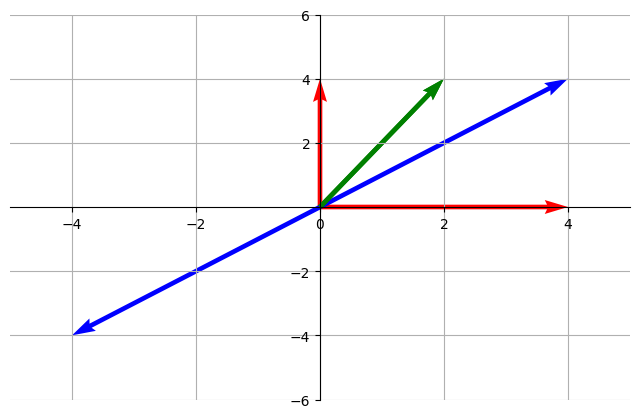

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

yticks = ax.get_yticks()
ax.set_yticks([y for y in yticks if y != 0])

v1 = np.array([4, 0])
v2 = np.array([0, 4])

ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red')

v3 = np.array([-4, -4])
v4 = np.array([4, 4])

ax.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='blue')
ax.quiver(0, 0, v4[0], v4[1], angles='xy', scale_units='xy', scale=1, color='blue')

v5 = np.array([2, 4])
v6 = np.array([2, 4])

ax.quiver(0, 0, v5[0], v5[1], angles='xy', scale_units='xy', scale=1, color='green')
ax.quiver(0, 0, v6[0], v6[1], angles='xy', scale_units='xy', scale=1, color='green')

ax.grid(True)
plt.show()

#### Same direction

In [53]:
vec_1 = np.array([2, 4])
vec_2 = np.array([2, 4])
vector_direction(vec_1, vec_2)

np.float64(0.9999999999999998)

#### Opposite direction

In [54]:
vec_1 = np.array([-4, -4])
vec_2 = np.array([4, 4])
vector_direction(vec_1, vec_2)

np.float64(-0.9999999999999998)

#### Perpendicular direction

In [55]:
vec_1 = np.array([0, 4])
vec_2 = np.array([4, 0])
vector_direction(vec_1, vec_2)

np.float64(0.0)

### The Minkowski Metric in Four-Dimensional Spacetime
---

### Minkowski spacetime

$$\LARGE x^\mu = (t, x, y, z) $$

The metric is:

$$\LARGE
\eta_{\mu\nu} =
\begin{bmatrix}
-1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Interval:

$$\LARGE ds^2 = \eta_{\mu\nu}dx^\mu dx^\nu$$

### Types of Spacetime Intervals

In special relativity, the separation between two events in spacetime is described by the invariant interval:

$$\LARGE
ds^2 = -dt^2 + dx^2 + dy^2 + dz^2
$$

Depending on the sign of $$\LARGE ds^2 $$ three distinct types of intervals arise.

### 1. Timelike Interval $$\small ds^2 < 0 $$

A timelike interval occurs when the temporal separation between two events dominates over their spatial separation. In this case, the condition

$$\LARGE
dt^2 > dx^2 + dy^2 + dz^2
$$

is satisfied.

Physically, this means that the events can be connected by a particle moving at a velocity less than the speed of light. Such events lie inside the light cone and can be causally related.

Only timelike intervals admit the definition of **proper time**:

$$\LARGE
d\tau^2 = -ds^2
$$

This concept is fundamental for understanding time dilation.

### 2. Spacelike Interval $$\small ds^2 > 0 $$

A spacelike interval arises when the spatial separation between two events exceeds their temporal separation:

$$\LARGE
dx^2 + dy^2 + dz^2 > dt^2
$$

In this case, no signal traveling at or below the speed of light can connect the events. They lie outside each other’s light cones and cannot be causally related.

Spacelike intervals do not correspond to the physical motion of material particles.

### 3. Null (Lightlike) Interval $$\small ds^2 = 0 $$

A null interval satisfies:

$$\LARGE
dt^2 = dx^2 + dy^2 + dz^2
$$

This corresponds precisely to motion at the speed of light. Light rays and other massless particles follow null worldlines.

For such trajectories, the proper time vanishes:

$$\LARGE
d\tau = 0
$$

### Focus of This Project

In this project, we briefly introduce all three types of spacetime intervals for conceptual completeness.

However, since **time dilation** is defined through the concept of proper time — which exists only for timelike intervals — we will focus exclusively on the **timelike case** and analyze it in detail.
